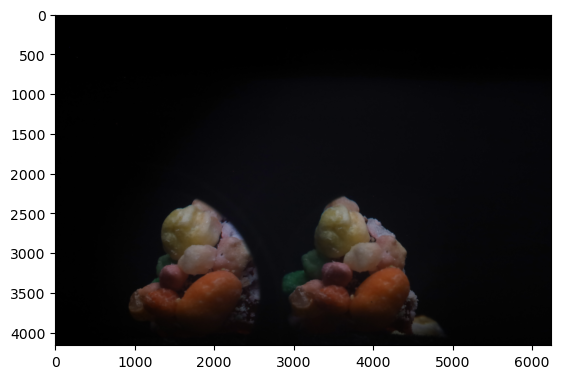

In [11]:
import glob
from PIL import Image
import matplotlib.pyplot as plt
import os
import numpy as np

img1 = Image.open(f"/home/vitran/gs5/pinhole_data/input/IMG_0013.JPG")
img2 = Image.open(f"/home/vitran/gs5/pinhole_data/input/IMG_0016.JPG")

img1 = np.asarray(img1)
img2 = np.asarray(img2)

img = img1+img2
plt.imshow(img)


In [2]:
from PIL import Image
import numpy as np
from scipy.signal import correlate

def load_image(image_path):
    with Image.open(image_path) as img:
        return np.array(img.convert('L'))  # Convert image to grayscale

def compute_shift(image1, image2):
    # Compute the cross-correlation between the two images
    correlation = correlate(image1, image2, mode='full')
    # return correlation
    
    # Find the index of the maximum value in the cross-correlation
    max_idx = np.unravel_index(np.argmax(correlation), correlation.shape)
    
    # Compute the shift
    shift = np.array(max_idx) - np.array(image2.shape) + np.array(image1.shape) - 1
    
    return shift

# Load your images
image1 = load_image("/home/vitran/gs5/pinhole_data/input/IMG_0013.JPG")
image2 = load_image("/home/vitran/gs5/pinhole_data/input/IMG_0016.JPG")

# Compute the shift
shift = compute_shift(image1, image2)
print(f"Shift required: {shift}")


/home/vitran/miniconda3/envs/ipyV8/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


corre  (130, 195)
maxid  (0, 131)
shift  [ -1 130]
Shift required: [ -1 130]


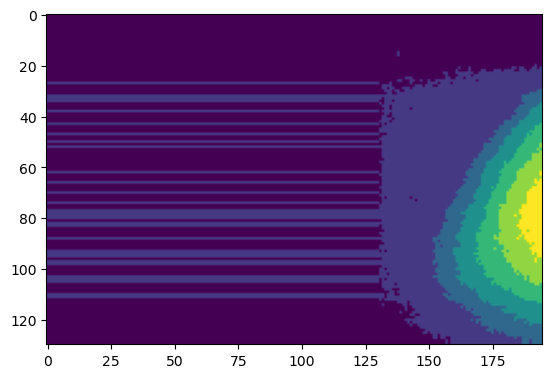

In [12]:
from PIL import Image
import numpy as np
from scipy.fft import fft2, ifft2, fftshift
from scipy.ndimage import shift as ndi_shift
from scipy.signal import correlate


def load_image(image_path):
    scale_factor = 1/32
    with Image.open(image_path) as img:
        width, height = img.size
        new_width = int(width * scale_factor)
        new_height = int(height * scale_factor)

        # Resize image
        resized_img = img.resize((new_width, new_height))
        # print(resized_img.size)
        return np.array(resized_img.convert('L'))  # Convert image to grayscale

def save_image(image_array, output_path):
    img = Image.fromarray(image_array)
    img.save(output_path)
    

def compute_shift(image1, image2):
    # Compute the cross-correlation between the two images
    # print(image1.size)
    correlation = correlate(image1, image2, mode='same')
    print("corre ", correlation.shape)
    # return correlation
    
    # Find the index of the maximum value in the cross-correlation
    max_idx = np.unravel_index(np.argmax(correlation), correlation.shape)
    print("maxid ", max_idx)
    # Compute the shift
    shift = np.array(max_idx) - np.array(image2.shape) + np.array(image1.shape) - 1
    print("shift ", shift)
    return shift

def compute_shift_fft(image1, image2):
    # Compute the FFT of both images
    f1 = fft2(image1)
    f2 = fft2(image2)
    
    # Compute the cross-correlation in the frequency domain
    cross_correlation = ifft2(f1 * np.conj(f2))
    
    # Shift the zero frequency component to the center
    cross_correlation = fftshift(cross_correlation)
    
    # Find the index of the maximum value in the cross-correlation
    max_idx = np.unravel_index(np.argmax(np.abs(cross_correlation)), cross_correlation.shape)
    
    # Compute the shift
    shift = np.array(max_idx) - np.array(image1.shape)
    
    return shift

def apply_shift(image, shift):
    # Apply the shift using nearest mode to handle borders
    shifted_image = ndi_shift(image, shift, mode='nearest')
    return shifted_image

# Load your images
image1 = load_image("/home/vitran/gs5/pinhole_data/input/IMG_0013.JPG")
image2 = load_image("/home/vitran/gs5/pinhole_data/input/IMG_0016.JPG")

corr = None
# Compute the shift
# shift = compute_shift_fft(image1, image2)
shift = compute_shift(image1, image2)
print(f"Shift required: {shift}")


# Apply the shift to image1
shifted_image1 = apply_shift(image1, shift)
plt.imshow( shifted_image1)
# # save_image(shifted_image1, 'shifted_image2.jpg')


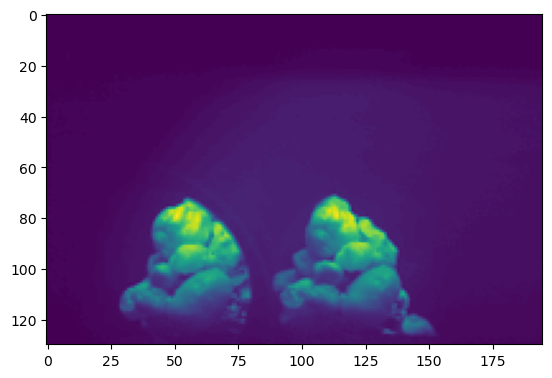

In [12]:
plt.imshow(image1+image2)

In [13]:
image1.shape

(130, 195)

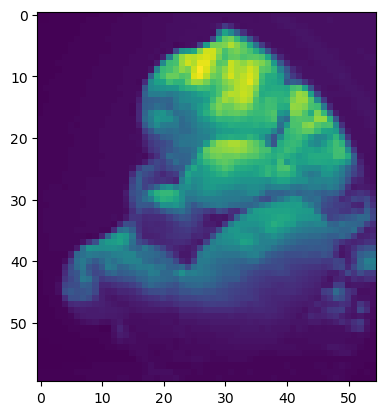

In [36]:
plt.imshow(image2[70:, 25:80])
# image2.shape

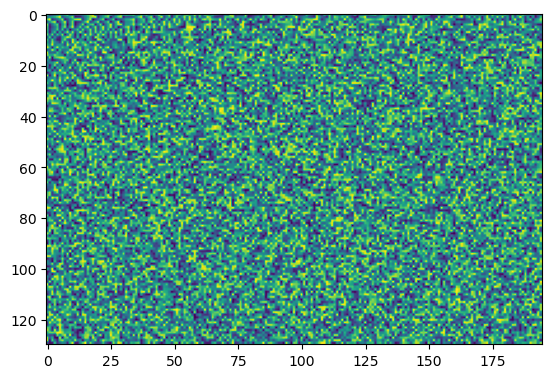

In [37]:
corr = correlate2d(image1, image2[70:, 25:80], mode='same')
plt.imshow(corr)

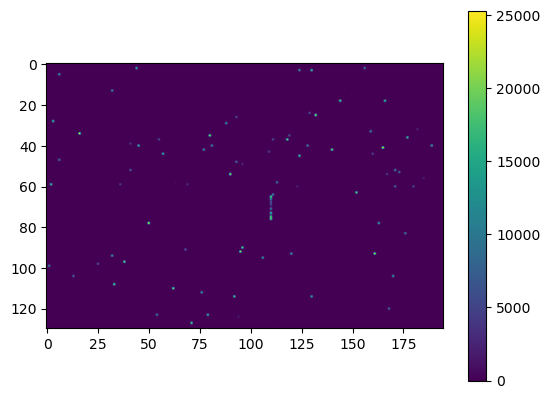

In [38]:
from scipy import ndimage

image2_cropped = image2[70:, 25:80]
corr1 = ndimage.correlate(image1, image2_cropped, mode='constant', cval = 1e-9)

avg_filter1 = np.ones(image1.shape)
result_avg1 = ndimage.correlate(image1, avg_filter1, mode='constant', cval = 1e-9)
raw_matches1 = corr1/(result_avg1+1e-2)

plt.imshow(raw_matches1)
plt.colorbar()

In [41]:
a = np.roll(image1,raw_matches1)
plt.imshow(a)

ValueError: 'shift' and 'axis' should be scalars or 1D sequences

In [39]:
max_idx = np.unravel_index(np.argmax(np.abs(raw_matches1)), raw_matches1.shape)
print(max_idx)

(41, 165)


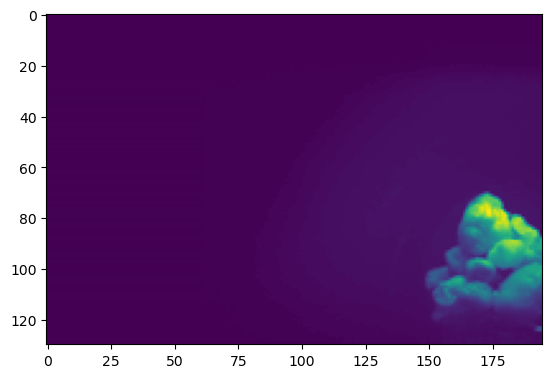

In [14]:
import matplotlib.pyplot as plt

s_img2 = ndi_shift(image1, (-1,60), mode='nearest')
# s_img0 = ndi_shift(image2, (0,0), mode='nearest')

plt.imshow(s_img2)